In [ ]:
#!pip install torch torchvision -U

In [ ]:
import torch
import yfinance as yf
import pandas as pd
import numpy as np
from copy import deepcopy as dc
import matplotlib.pyplot as plt

## DATA IMPORT

In [ ]:
companies = ["AAPL", "MSFT", "AMZN", "BA"]
#multi_data = yf.download(companies, start="2024-04-05", end="2024-04-12") #sample companies

dowjones_comps = [
    "AAPL", "MSFT", "AMZN", "GOOGL",  # Big Tech # "FB"
    "JNJ", "PFE", "MRK", "UNH", "ABT",      # Healthcare
    "PG", "KO", "PEP", "WMT", "HD",         # Consumer
    "GS", "JPM", "V", "AXP", "CRM",         # Financials
    "DIS", "NFLX", "CMCSA", "T", "INTC",    # Media & Telecom
    "NKE", "MCD", "SBUX", "CAT", "MMM",     # Industrials
    "BA", "HON", "UNP", "DOW",       # Industrials #"UTX"
    "IBM", "CSCO", "AAP", "TRV", "CVX",     # Other
    "XOM", "VZ", "MS", "RTX", "WBA"         # Other
]

multi_data = yf.download(dowjones_comps, start="2021-04-05", end="2024-04-05")

[*********************100%%**********************]  43 of 43 completed


In [ ]:
pd.DataFrame(multi_data)

Price        Adj Close                                                  \
Ticker             AAP        AAPL         ABT        AMZN         AXP   
Date                                                                     
2021-04-05  169.531815  123.742043  113.158661  161.336502  140.476669   
2021-04-06  169.920441  124.046722  113.262512  161.190994  140.563248   
2021-04-07  168.967453  125.707764  113.394691  163.969498  141.505783   
2021-04-08  167.005966  128.125565  113.083130  164.964996  141.419220   
2021-04-09  170.216553  130.720337  114.140526  168.610001  142.130951   
...                ...         ...         ...         ...         ...   
2024-03-28   84.817093  171.479996  113.099098  180.380005  226.986740   
2024-04-01   85.156006  170.029999  111.536835  180.970001  226.906982   
2024-04-02   83.650848  168.839996  111.467178  180.690002  224.833405   
2024-04-03   83.890083  169.649994  110.730835  182.410004  225.930008   
2024-04-04   79.005798  168.820007  109.566612  180.000000  219.589996   

Price                                                                 ...  \
Ticker              BA         CAT      CMCSA         CRM       CSCO  ...   
Date                                                                  ...   
2021-04-05  259.359985  218.536285  50.467190  220.002609  47.867191  ...   
2021-04-06  255.169998  215.665588  50.735489  220.801575  47.520130  ...   
2021-04-07  252.580002  215.450546  50.513454  220.501953  47.282669  ...   
2021-04-08  254.949997  215.515991  50.263664  224.157181  47.410530  ...   
2021-04-09  252.360001  215.768463  49.560543  230.978271  47.574936  ...   
...                ...         ...        ...         ...        ...  ...   
2024-03-28  192.990005  365.099121  43.032154  301.179993  49.505543  ...   
2024-04-01  189.500000  362.418884  41.969997  302.260010  49.634491  ...   
2024-04-02  188.039993  363.504913  41.810001  304.000000  48.959999  ...   
2024-04-03  184.919998  374.425140  41.529999  304.739990  48.740002  ...   
2024-04-04  183.289993  368.446930  41.110001  294.140015  48.110001  ...   

Price        Volume                                                            \
Ticker         SBUX         T      TRV       UNH      UNP         V        VZ   
Date                                                                            
2021-04-05  6913100  50996905  1260700   2709400  1958400  10440500  14326300   
2021-04-06  6745200  44574314  1349200   2698600  1590800   7828100  12198300   
2021-04-07  5629600  53821262  1694200   2158900  1634200   5614300  13218400   
2021-04-08  5011300  66037678  1740700   2426700  1983900  11042000  16472400   
2021-04-09  4114300  44111311  1377600   2483200  2383700   5724900  13872000   
...             ...       ...      ...       ...      ...       ...       ...   
2024-03-28  6784300  33461500   871100   3820000  2265900   5844400  19771400   
2024-04-01  4990200  31980100   801300   2928700  2493800   5084000  15031600   
2024-04-02  8276800  40169500  1115800  11867000  2019400   6912300  17260800   
2024-04-03  6316400  38155900   856600   4460400  2097200   4536600  18211800   
2024-04-04  8057600  31850300  1212000   5182000  2062500   4018600  16461400   

Price                                     
Ticker           WBA       WMT       XOM  
Date                                      
2021-04-05   6142100  40043100  23264800  
2021-04-06   4807700  31044600  18926300  
2021-04-07   4315500  20361600  22385000  
2021-04-08   5879800  19095600  21999300  
2021-04-09   5310000  20676600  20020700  
...              ...       ...       ...  
2024-03-28  32886800  17535100  18482100  
2024-04-01  36186100  13837600  13817000  
2024-04-02  28791400  19510100  19919600  
2024-04-03  21358500  14615100  16504300  
2024-04-04  14574400  14436100  18467400  

[756 rows x 258 columns]

In [ ]:
multi_data.values

array([[1.69531815e+02, 1.23742043e+02, 1.13158661e+02, ...,
        6.14210000e+06, 4.00431000e+07, 2.32648000e+07],
       [1.69920441e+02, 1.24046722e+02, 1.13262512e+02, ...,
        4.80770000e+06, 3.10446000e+07, 1.89263000e+07],
       [1.68967453e+02, 1.25707764e+02, 1.13394691e+02, ...,
        4.31550000e+06, 2.03616000e+07, 2.23850000e+07],
       ...,
       [8.36508484e+01, 1.68839996e+02, 1.11467178e+02, ...,
        2.87914000e+07, 1.95101000e+07, 1.99196000e+07],
       [8.38900833e+01, 1.69649994e+02, 1.10730835e+02, ...,
        2.13585000e+07, 1.46151000e+07, 1.65043000e+07],
       [7.90057983e+01, 1.68820007e+02, 1.09566612e+02, ...,
        1.45744000e+07, 1.44361000e+07, 1.84674000e+07]])

In [ ]:
#1 version formating
#md_values = multi_data.values

# Get the shape of the original array
#rows, cols = md_values.shape
#num_companies = len(dowjones_comps)
#num_features = 6

# Reshape the array to reorder it by [date, company, features]
#values_3d = md_values.reshape(rows, num_companies, num_features)
#values_3d

In [ ]:
#data normalization/scaling?
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
multi_data = scaler.fit_transform(multi_data)

In [ ]:
#2 version formating
#md_values = multi_data.values
rows, cols = multi_data.shape
num_companies = len(dowjones_comps)
values_3d = md_values.reshape(rows, int(cols/num_companies), num_companies)
#values_3d # [ Date_idx, PriceCol_idx, CompanyCol_idx]

In [ ]:
X = values_3d[:, 1:]
y = values_3d[:, 0]

split_index = int(len(X) * 0.95)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X.shape, y.shape

((756, 5, 43), (756, 43))

In [ ]:
tensor_3d = torch.tensor(values_3d)
input = tensor_3d.to(torch.float32)
tensor_3d.size()

torch.Size([756, 6, 43])

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# switch to using GPU?

# Make model
#rnn = torch.nn.LSTM(43, 20, 2) #self, input_size(num ), hidden_size, num_stacked_layers

#h0 = torch.randn(2, 6, 20) #inital hidden state, default is zero
#c0 = torch.randn(2, 6, 20) #inital cell state, default is zero
#output, (hn, cn) = rnn(input, (h0, c0))

## Kara's work

In [ ]:
# make model
class LSTM(torch.nn.Module):
  def __init__(self, input_size, hidden_size, stacked_size):
    super().__init__()
    self.hidden_size = hidden_size
    self.stacked_size = stacked_size
    self.lstm = torch.nn.LSTM(input_size, hidden_size, stacked_size, batch_first=True)
    self.fc = torch.nn.Linear(hidden_size, 1) # fc is fully connected layer, the 1 for predicting final/closing value


  def forward(self, x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.stacked_size, batch_size, self.hidden_size)
    c0 = torch.zeros(self.stacked_size, batch_size, self.hidden_size)
    out, (hn, cn) = self.lstm(x, (h0, c0))
    out = self.fc(out[:, -1, :])
    return out


model = LSTM(43, 30, 6)

In [ ]:
# now train model
def train_epoch():
  model.train(True)
  print(f'Epoch: {epoch + 1}')
  running_loss = 0.0

  for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0], batch[1]

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch_index+1) %10 == 0:  # print every 100 batches
          avg_loss_across_batches = running_loss / 100
          print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
          running_loss = 0.0
        print()

In [ ]:
#for testing model
def validate_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0], batch[1]

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
loss_function  = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) #could use Adam
epoch_size = 300

for epoch in range(epoch_size):
  train_epoch()
  validate_epoch()

Epoch: 1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16, 43])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 10, Loss: 3258.049
Batch 20, Loss: 2403.844
Batch 30, Loss: 1518.132
Batch 40, Loss: 1193.653

Val Loss: 19366.734
***************************************************

Epoch: 2
Batch 10, Loss: 1073.083


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([14, 43])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([6, 43])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 20, Loss: 1083.692
Batch 30, Loss: 1105.763
Batch 40, Loss: 1084.345

Val Loss: 18232.326
***************************************************

Epoch: 3
Batch 10, Loss: 1078.247
Batch 20, Loss: 1096.320
Batch 30, Loss: 1063.588
Batch 40, Loss: 1070.300

Val Loss: 18180.701
***************************************************

Epoch: 4
Batch 10, Loss: 1065.447
Batch 20, Loss: 1075.623
Batch 30, Loss: 1125.162
Batch 40, Loss: 1047.539

Val Loss: 18192.117
***************************************************

Epoch: 5
Batch 10, Loss: 1080.954
Batch 20, Loss: 1111.817
Batch 30, Loss: 1066.538
Batch 40, Loss: 1048.947

Val Loss: 18200.149
***************************************************

Epoch: 6
Batch 10, Loss: 1081.443
Batch 20, Loss: 1083.857
Batch 30, Loss: 1086.619
Batch 40, Loss: 1053.117

Val Loss: 18189.118
***************************************************

Epoch: 7
Batch 10, Loss: 1083.966
Batch 20, Loss: 1059.828
Batch 30, Loss: 1097.771
Batch 40, Loss: 1082.330

Val Loss:

In [ ]:
plt.plot(y_batch, label='Actual Close')
plt.plot(output, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

NameError: name 'y_batch' is not defined

In [ ]:
# need to put output through nn.Linear at the end to actually predict values
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device
days = 5

test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], days+1))
# Get the min and max values obtained during fitting
min_val = scaler.data_min_[0]
max_val = scaler.data_max_[0]

# Perform manual inverse scaling
dummies_scaled = (dummies * (max_val - min_val)) + min_val
dummies_scaled[:, 0] = test_predictions

test_predictions = dc(dummies_scaled[:, 0])
test_predictions

array([148.58032227, 148.5803833 , 148.58041382, 148.58049011,
       148.58044434, 148.58041382, 148.5802002 , 148.58023071,
       148.58032227, 148.58024597, 148.58045959, 148.58045959,
       148.58035278, 148.58036804, 148.58033752, 148.58041382,
       148.5803833 , 148.58044434, 148.5803833 , 148.5803833 ,
       148.58041382, 148.58042908, 148.5803833 , 148.5803833 ,
       148.58035278, 148.58041382, 148.58047485, 148.58023071,
       148.58033752, 148.58030701, 148.58035278, 148.5803833 ,
       148.58033752, 148.58024597, 148.58024597, 148.57997131,
       148.58016968, 148.57951355])

In [ ]:
dummies = np.zeros((X_test.shape[0], days+1))
min_val = scaler.data_min_[0]
max_val = scaler.data_max_[0]

# Perform manual inverse scaling
dummies_scaled = (dummies * (max_val - min_val)) + min_val

new_y_test = dc(dummies_scaled[:, 0])
new_y_test

array([47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751, 47.8980751, 47.8980751,
       47.8980751, 47.8980751, 47.8980751])

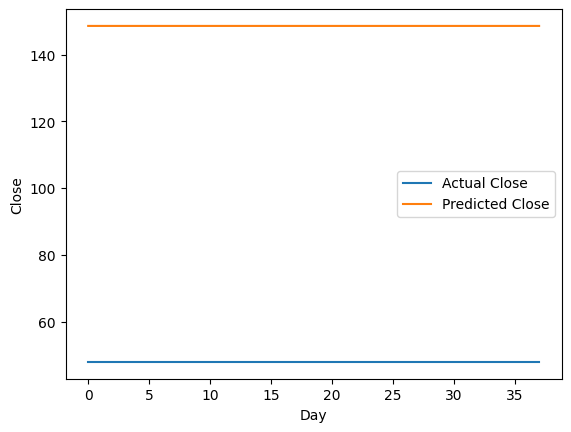

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
# Extract closing prices
closing_prices = multi_data['Close']

# Handling missing data by forward filling
closing_prices.fillna(method='ffill', inplace=True)


<ipython-input-9-42c969341be5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices.fillna(method='ffill', inplace=True)


Kenneth trying:

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Dow Jones components
#dowjones_comps = ["AAPL", "AMZN", "GOOGL", "JNJ", "PFE", "MRK", "UNH", "ABT", "PG", "KO", "PEP", "WMT", "HD", "GS", "JPM", "V", "AXP", "CRM", "DIS", "NFLX", "CMCSA", "T", "INTC", "NKE", "MCD", "SBUX", "CAT", "MMM", "BA", "HON", "UNP", "DOW", "IBM", "CSCO", "AAP", "TRV", "CVX", "XOM", "VZ", "MS", "RTX", "WBA"]
dowjones_comps = ["AMZN", "JNJ", "MRK"]

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Dow Jones components
#dowjones_comps = ["AAPL", "AMZN", "GOOGL", "JNJ", "PFE", "MRK", "UNH", "ABT", "PG", "KO", "PEP", "WMT", "HD", "GS", "JPM", "V", "AXP", "CRM", "DIS", "NFLX", "CMCSA", "T", "INTC", "NKE", "MCD", "SBUX", "CAT", "MMM", "BA", "HON", "UNP", "DOW", "IBM", "CSCO", "AAP", "TRV", "CVX", "XOM", "VZ", "MS", "RTX", "WBA"]
dowjones_comps = ["AAPL","AMZN", "JNJ", "MRK"]
multi_data = yf.download(dowjones_comps, start="2018-04-05", end="2024-04-05")
data_aapl = multi_data['Close']['AAPL'].dropna()  # Select only 'Close' prices for 'AAPL'

# Create lagged features for LSTM
def create_lagged_features(series, n_lags):
    df = pd.DataFrame(series)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = series.shift(i)
    df.dropna(inplace=True)  # Drop rows with NaN values which are the result of shifting
    return df

# Number of lagged days
n_lags = 7
data_aapl_prepared = create_lagged_features(data_aapl, n_lags)

# Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
data_aapl_scaled = scaler.fit_transform(data_aapl_prepared)  # Convert DataFrame to NumPy array and scale

data_aapl




[*********************100%%**********************]  4 of 4 completed


Date
2018-04-05     43.200001
2018-04-06     42.095001
2018-04-09     42.512501
2018-04-10     43.312500
2018-04-11     43.110001
                 ...    
2024-03-28    171.479996
2024-04-01    170.029999
2024-04-02    168.839996
2024-04-03    169.649994
2024-04-04    168.820007
Name: AAPL, Length: 1510, dtype: float64

In [ ]:
def prepare_stock_data(stock_symbol, data, n_lags):
    series = data['Close'][stock_symbol].dropna()
    df = create_lagged_features(series, n_lags)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(df)
    return scaled_data, scaler

n_lags = 7  # Number of days to look back
all_data_scaled = {}
all_scalers = {}

for stock in dowjones_comps:
    scaled_data, scaler = prepare_stock_data(stock, multi_data, n_lags)
    all_data_scaled[stock] = scaled_data
    all_scalers[stock] = scaler



In [ ]:
def split_data(data, train_ratio=0.9):
    num_train = int(len(data) * train_ratio)
    return data[:num_train], data[num_train:]

train_data = {}
test_data = {}

for stock, data in all_data_scaled.items():
    train, test = split_data(data)
    train_data[stock] = train
    test_data[stock] = test


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        out, _ = self.lstm(x)
        # After LSTM: out shape should be (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # Select the last time step output
        return out

def train_model(data, epochs=10, batch_size=32):
    model.train()
    # Reshape data to be 3D: [samples, time steps, features]
    inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)  # Adding sequence length dimension
    targets = torch.tensor(data[:, 0]).float().unsqueeze(1)  # Ensure targets are 2D

    dataset = TensorDataset(inputs, targets)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    losses = [] # Initializes a list to store the losses
    for epoch in range(epochs):
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

input_size = 1  # As we have reshaped the input to be [samples, time steps, features] with features=1
hidden_size = 20
num_layers = 2

# Initializing model
model = StockLSTM(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model on AAPL data
train_model(train_data['AAPL'])



Epoch 1, Loss: 0.1873270869255066
Epoch 2, Loss: 0.006656731478869915
Epoch 3, Loss: 0.005202320870012045
Epoch 4, Loss: 0.007754229009151459
Epoch 5, Loss: 0.0018371939659118652
Epoch 6, Loss: 0.001963620539754629
Epoch 7, Loss: 0.0020763506181538105
Epoch 8, Loss: 0.003416570834815502
Epoch 9, Loss: 0.0007954370812512934
Epoch 10, Loss: 0.0013390264939516783


Epoch 1/20, Loss: 0.3499693760100533
Epoch 2/20, Loss: 0.2174515104469131
Epoch 3/20, Loss: 0.012981449349728577
Epoch 4/20, Loss: 0.00818541000925881
Epoch 5/20, Loss: 0.006929182885762523
Epoch 6/20, Loss: 0.006078600294559318
Epoch 7/20, Loss: 0.005234596127753749
Epoch 8/20, Loss: 0.004564271119477994
Epoch 9/20, Loss: 0.00404522004948162
Epoch 10/20, Loss: 0.0035960409776581563
Epoch 11/20, Loss: 0.0031098623171120004
Epoch 12/20, Loss: 0.00281590062111397
Epoch 13/20, Loss: 0.002510132279712707
Epoch 14/20, Loss: 0.0023543544004068656
Epoch 15/20, Loss: 0.0021999994255191484
Epoch 16/20, Loss: 0.0019408047565615133
Epoch 17/20, Loss: 0.0019040023367030217
Epoch 18/20, Loss: 0.0018466366783661
Epoch 19/20, Loss: 0.0019698452204465868
Epoch 20/20, Loss: 0.0018886874046395807


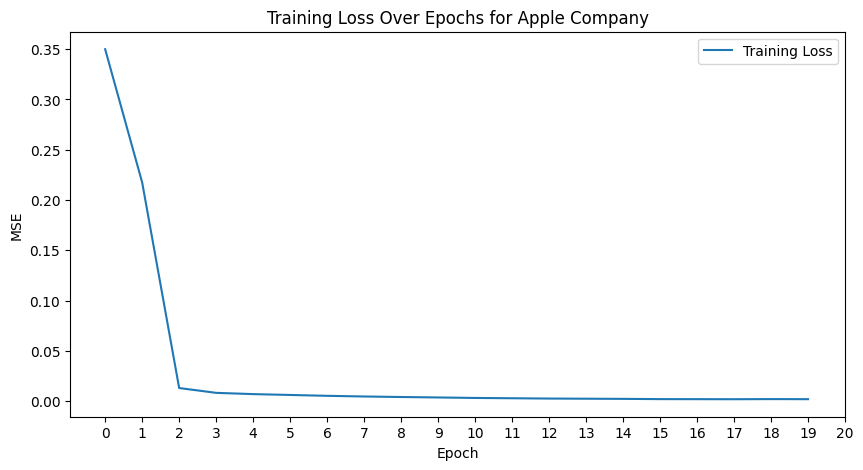

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        out, _ = self.lstm(x)
        # After LSTM: out shape should be (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # Select the last time step output
        return out

def train_model(data, model, criterion, optimizer, epochs=20, batch_size=16):
    model.train()
    epoch_losses = []  # List to store the average loss of each epoch
    # Reshape data to be 3D: [samples, time steps, features]
    inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)
    targets = torch.tensor(data[:, 0]).float().unsqueeze(1)

    dataset = TensorDataset(inputs, targets)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        total_loss = 0
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(loader)
        epoch_losses.append(avg_loss)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

    # Plot the loss over the epochs
    plt.figure(figsize=(10, 5))
    plt.plot(epoch_losses, label='Training Loss')
    plt.title('Training Loss Over Epochs for Apple Company')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.xticks(range(0,21,1))
    plt.legend()
    plt.show()

    return model, epoch_losses

input_size = 1
hidden_size = 5
num_layers = 2

# Initializing model
model = StockLSTM(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model on AAPL data
trained_model, training_losses = train_model(train_data['AAPL'], model, criterion, optimizer)


In [ ]:
def evaluate_model(data, batch_size=16):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)  # Reshape and convert data
        targets = torch.tensor(data[:, 0]).float().unsqueeze(1)

        dataset = TensorDataset(inputs, targets)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        predictions = []
        actuals = []
        for inputs, targets in loader:
            outputs = model(inputs)
            predictions.append(outputs)
            actuals.append(targets)

        predictions = torch.cat(predictions).view(-1)
        actuals = torch.cat(actuals).view(-1)
        loss = criterion(predictions, actuals)
        print(f'Test Loss: {loss.item()}')
        return predictions.numpy(), actuals.numpy()

# Evaluating on AAPL test data
predictions, actuals = evaluate_model(test_data['AAPL'])


NameError: name 'model' is not defined

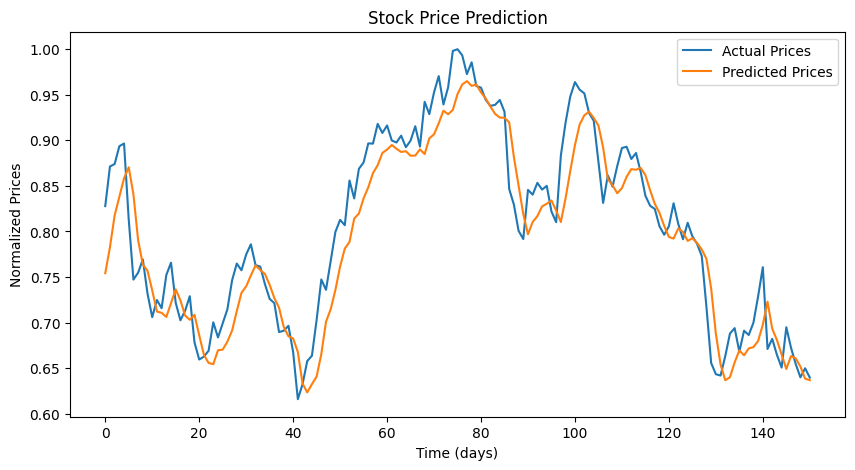

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Prices')
plt.legend()
plt.show()


Model 3

Epoch 1/100, Loss: 0.03776229204445639
Epoch 2/100, Loss: 0.004123939617591746
Epoch 3/100, Loss: 0.004475405838285737
Epoch 4/100, Loss: 0.0038491572732763254
Epoch 5/100, Loss: 0.004229801615207073
Epoch 6/100, Loss: 0.00431289576980121
Epoch 7/100, Loss: 0.003775511062977945
Epoch 8/100, Loss: 0.003404752495150794
Epoch 9/100, Loss: 0.00436590240090428
Epoch 10/100, Loss: 0.0032622092670541915
Epoch 11/100, Loss: 0.0038691775832215653
Epoch 12/100, Loss: 0.004612282171900219
Epoch 13/100, Loss: 0.0028191485722987527
Epoch 14/100, Loss: 0.0027750251801027096
Epoch 15/100, Loss: 0.00344288329634925
Epoch 16/100, Loss: 0.002984747159130433
Epoch 17/100, Loss: 0.0036788520129287946
Epoch 18/100, Loss: 0.0025630105321076424
Epoch 19/100, Loss: 0.002689450026681537
Epoch 20/100, Loss: 0.002115706854965538
Epoch 21/100, Loss: 0.0029752111836226984
Epoch 22/100, Loss: 0.0027494760189095842
Epoch 23/100, Loss: 0.002704895451418398
Epoch 24/100, Loss: 0.00229500690680545
Epoch 25/100, Loss: 0

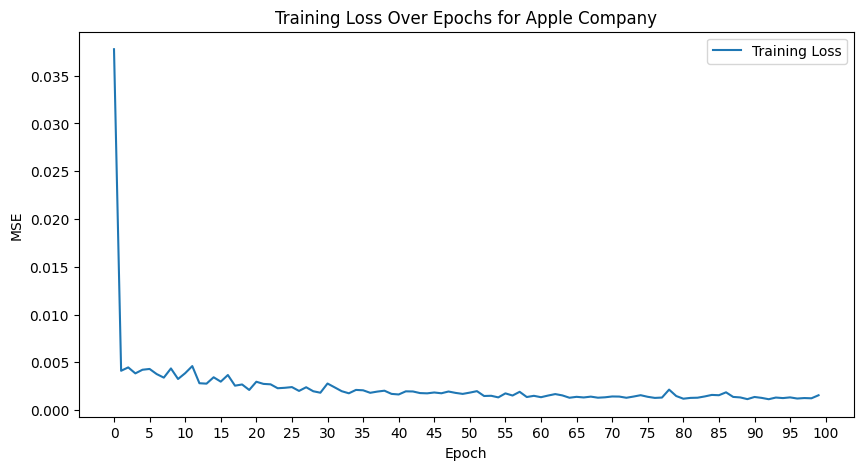

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.2):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x shape: (batch_size, seq_length, input_size)
        out, _ = self.lstm(x)
        # After LSTM: out shape should be (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # Select the last time step output
        return out

def train_model(data, model, criterion, optimizer, epochs=100, batch_size=16):
    model.train()
    epoch_losses = []  # List to store the average loss of each epoch
    # Reshape data to be 3D: [samples, time steps, features]
    inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)
    targets = torch.tensor(data[:, 0]).float().unsqueeze(1)

    dataset = TensorDataset(inputs, targets)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        total_loss = 0
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(loader)
        epoch_losses.append(avg_loss)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}')

    # Plot the loss over the epochs
    plt.figure(figsize=(10, 5))
    plt.plot(epoch_losses, label='Training Loss')
    plt.title('Training Loss Over Epochs for Apple Company')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.xticks(range(0, epochs + 1, 5))  # Adjust the range and step as needed
    plt.legend()
    plt.show()

    return model, epoch_losses

input_size = 1
hidden_size = 50
num_layers = 3
dropout = 0.2

# Initializing model with dropout
model = StockLSTM(input_size, hidden_size, num_layers, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

trained_model, training_losses = train_model(train_data['AAPL'], model, criterion, optimizer)



In [ ]:
def evaluate_model(data, batch_size=16):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)  # Reshape and convert data
        targets = torch.tensor(data[:, 0]).float().unsqueeze(1)

        dataset = TensorDataset(inputs, targets)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

        predictions = []
        actuals = []
        for inputs, targets in loader:
            outputs = model(inputs)
            predictions.append(outputs)
            actuals.append(targets)

        predictions = torch.cat(predictions).view(-1)
        actuals = torch.cat(actuals).view(-1)
        loss = criterion(predictions, actuals)
        print(f'Test Loss: {loss.item()}')
        return predictions.numpy(), actuals.numpy()

# Evaluating on AAPL test data
predictions, actuals = evaluate_model(test_data['AAPL'])

Test Loss: 0.001180098857730627


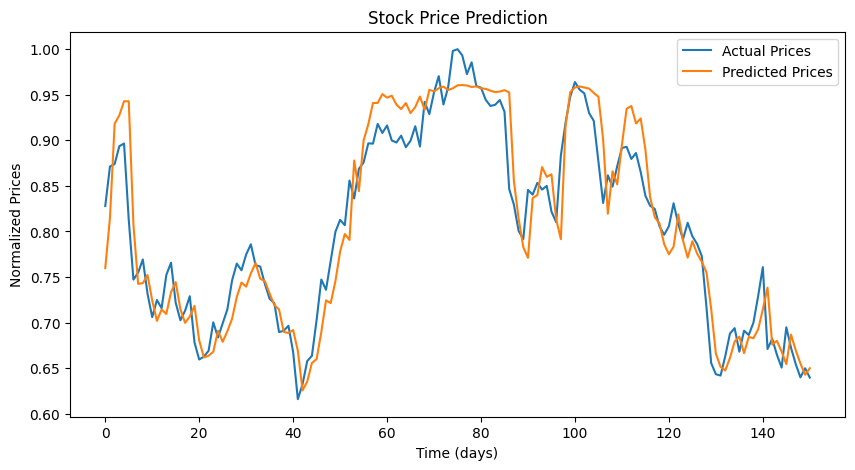

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Normalized Prices')
plt.legend()
plt.show()

In [ ]:
# Inverse scaling for the test dataset to view the actual prices
scaler = all_scalers['AAPL']
test_data_unscaled = scaler.inverse_transform(test_data['AAPL'])

# Converting to DataFrame
test_data_df = pd.DataFrame(test_data_unscaled, columns=[f'Close(t+1)'] + [f'Close(t-{i})' for i in range(1, n_lags + 1)])
test_data_df.round(2).head()



,Close(t+1),Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
0,184.12,180.19,178.61,176.38,181.12,177.23,175.84,174.49
1,187.65,184.12,180.19,178.61,176.38,181.12,177.23,175.84
2,187.87,187.65,184.12,180.19,178.61,176.38,181.12,177.23
3,189.46,187.87,187.65,184.12,180.19,178.61,176.38,181.12
4,189.70,189.46,187.87,187.65,184.12,180.19,178.61,176.38


Training and evaluating model for AAPL
Test Loss: 0.0015046321786940098
Test Loss for AAPL: 0.0015046321786940098


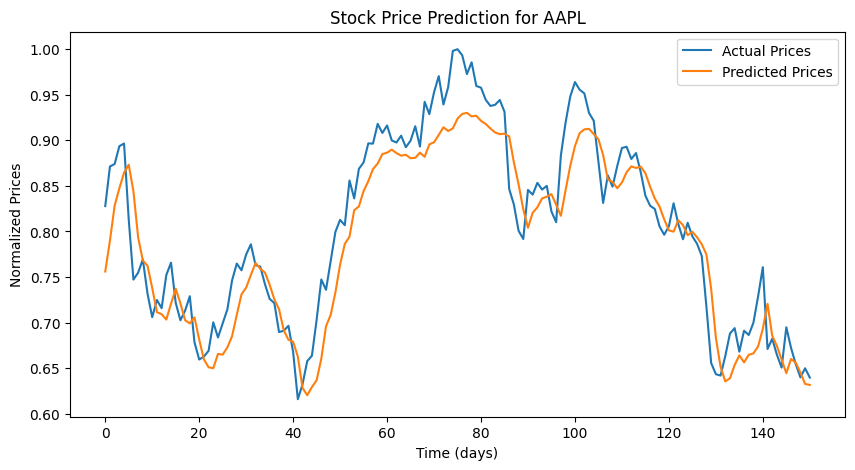

Training and evaluating model for AMZN
Test Loss: 0.0023611215874552727
Test Loss for AMZN: 0.0023611215874552727


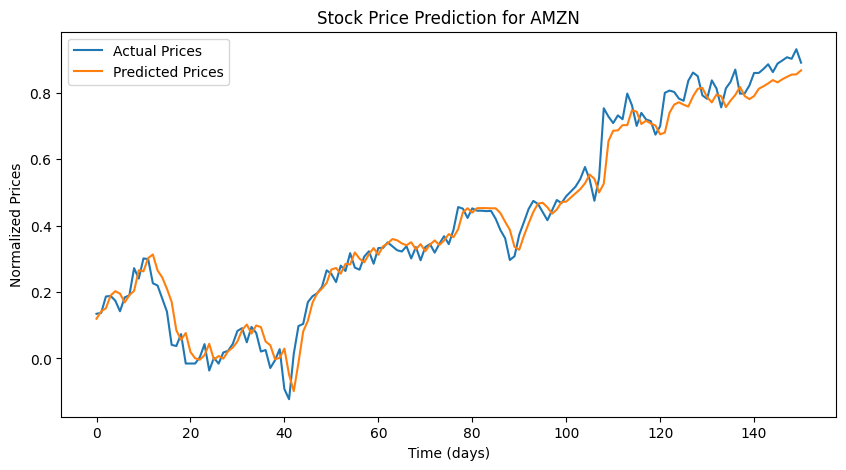

Training and evaluating model for JNJ
Test Loss: 0.001484195701777935
Test Loss for JNJ: 0.001484195701777935


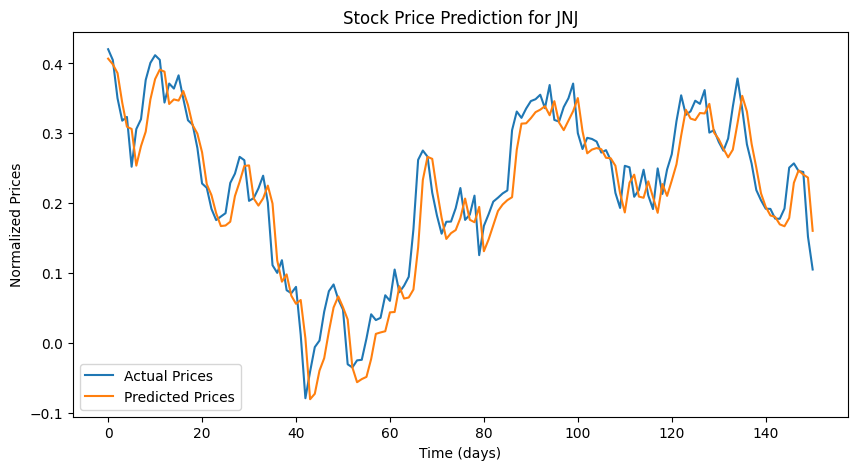

Training and evaluating model for MRK
Test Loss: 0.01470849197357893
Test Loss for MRK: 0.01470849197357893


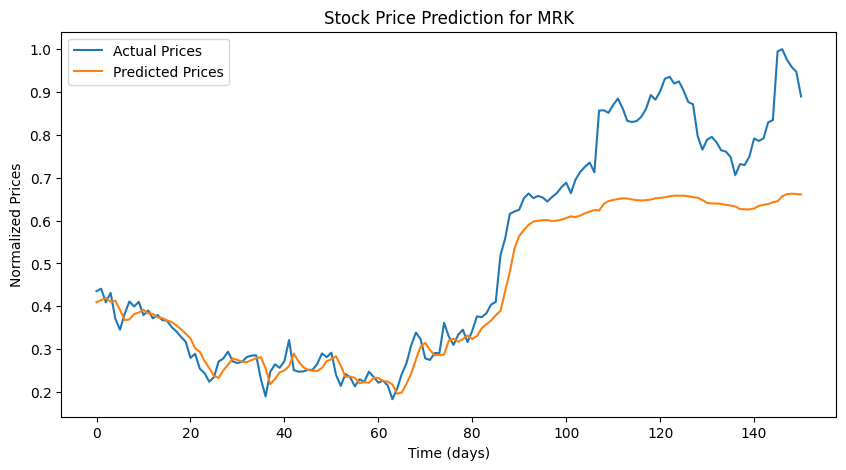

In [ ]:
# Storage for models and results
all_models = {}
all_predictions = {}
all_actuals = {}
all_test_losses = {}
input_size = 1
hidden_size = 50
num_layers = 3
dropout = 0.2
for stock in dowjones_comps:
    print(f'Training and evaluating model for {stock}')

    # Preparing the data
    train = torch.tensor(train_data[stock][:, 1:]).float().unsqueeze(-1)
    targets = torch.tensor(train_data[stock][:, 0]).float().unsqueeze(1)
    dataset = TensorDataset(train, targets)
    loader = DataLoader(dataset, batch_size=16, shuffle=True)

    # Initializing model
    model = StockLSTM(input_size, hidden_size, num_layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    # Training the model
    model.train()
    for epoch in range(100):
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Storing the trained model
    all_models[stock] = model

    # Evaluating the model
    predictions, actuals = evaluate_model(test_data[stock])
    all_predictions[stock] = predictions
    all_actuals[stock] = actuals

    # Calculating test loss
    test_loss = criterion(torch.tensor(predictions), torch.tensor(actuals))
    all_test_losses[stock] = test_loss.item()
    print(f'Test Loss for {stock}: {test_loss.item()}')

    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'Stock Price Prediction for {stock}')
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized Prices')
    plt.legend()
    plt.show()


Training and evaluating model for AMZN
Test Loss for AMZN: 0.0028378076385706663


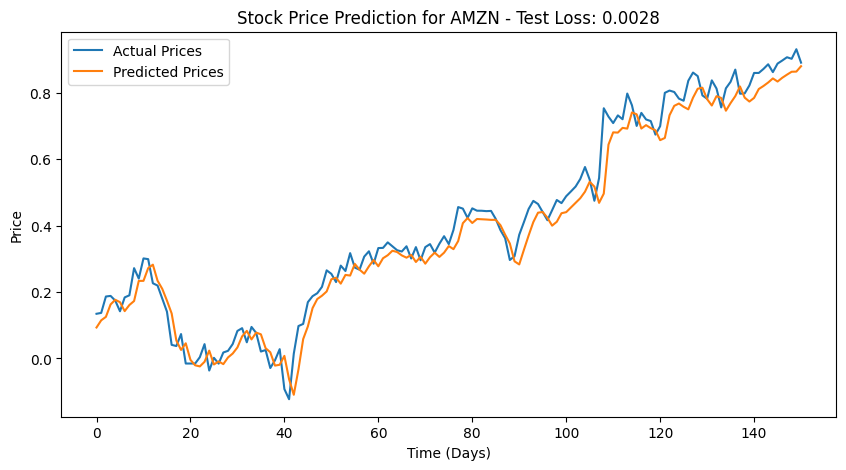

Training and evaluating model for JNJ
Test Loss for JNJ: 0.001503860461525619


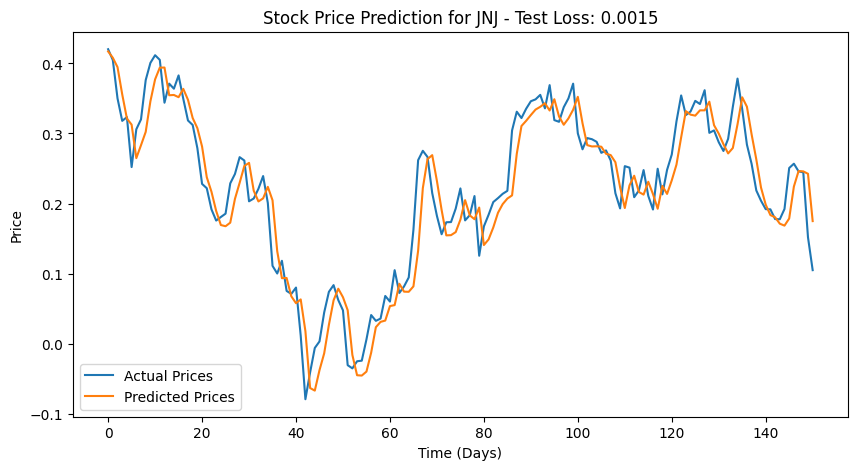

Training and evaluating model for MRK
Test Loss for MRK: 0.007221968844532967


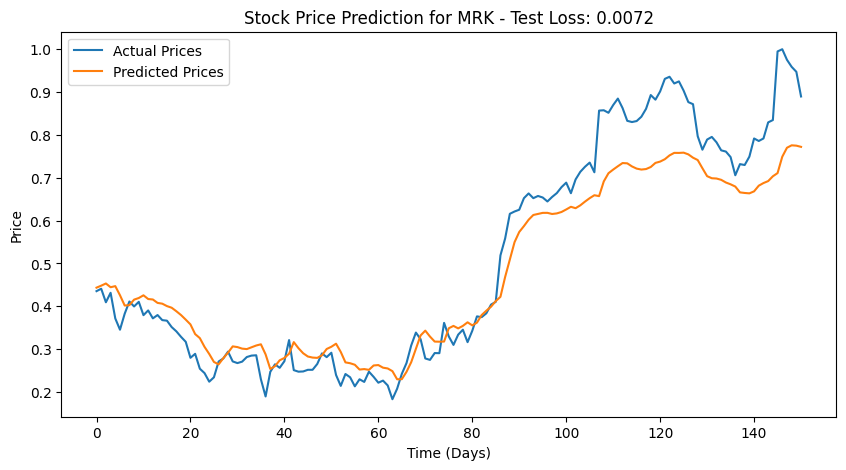

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Assuming StockLSTM and other initializations are already defined as per your previous snippets

# Storage for models and results
all_models = {}
all_predictions = {}
all_actuals = {}
all_test_losses = {}

for stock in dowjones_comps:
    print(f'Training and evaluating model for {stock}')

    # Preparing the data
    train = torch.tensor(train_data[stock][:, 1:]).float().unsqueeze(-1)
    targets = torch.tensor(train_data[stock][:, 0]).float().unsqueeze(1)
    dataset = TensorDataset(train, targets)
    loader = DataLoader(dataset, batch_size=16, shuffle=True)

    # Initializing model
    model = StockLSTM(input_size, hidden_size, num_layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    # Training the model
    model.train()
    for epoch in range(100):
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Storing the trained model
    all_models[stock] = model

    # Evaluating the model on test data
    model.eval()
    with torch.no_grad():
        test_inputs = torch.tensor(test_data[stock][:, 1:]).float().unsqueeze(-1)
        test_targets = torch.tensor(test_data[stock][:, 0]).float().unsqueeze(1)
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, test_targets).item()

    predictions = test_outputs.view(-1).numpy()
    actuals = test_targets.view(-1).numpy()

    all_predictions[stock] = predictions
    all_actuals[stock] = actuals
    all_test_losses[stock] = test_loss

    print(f'Test Loss for {stock}: {test_loss}')

    # Plotting the actual vs predicted prices with test loss in the title
    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'Stock Price Prediction for {stock} - Test Loss: {test_loss:.4f}')
    plt.xlabel('Time (Days)')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


[*********************100%%**********************]  4 of 4 completed


Training and evaluating model for AAPL
Loss for AAPL: 0.0013435104629024863


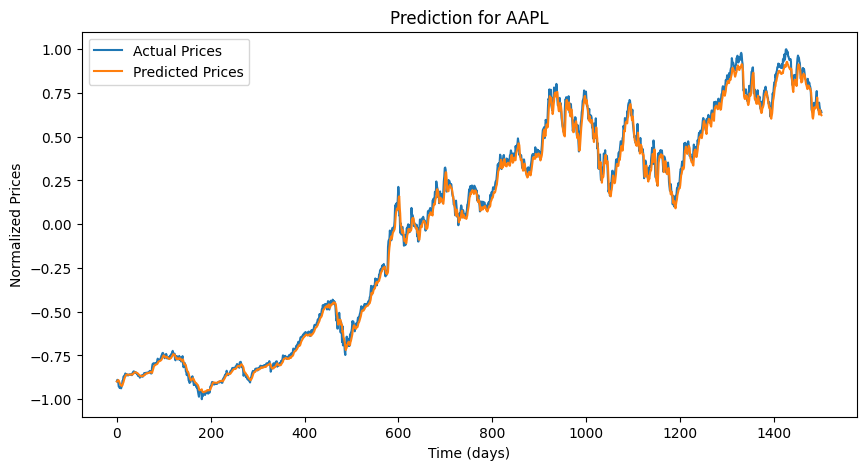

Training and evaluating model for AMZN
Loss for AMZN: 0.003364580450579524


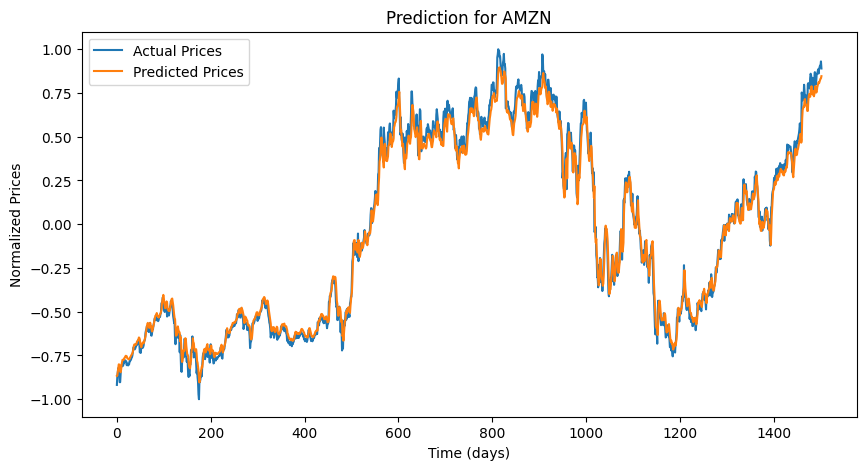

Training and evaluating model for GOOGL
Loss for GOOGL: 0.0019790350925177336


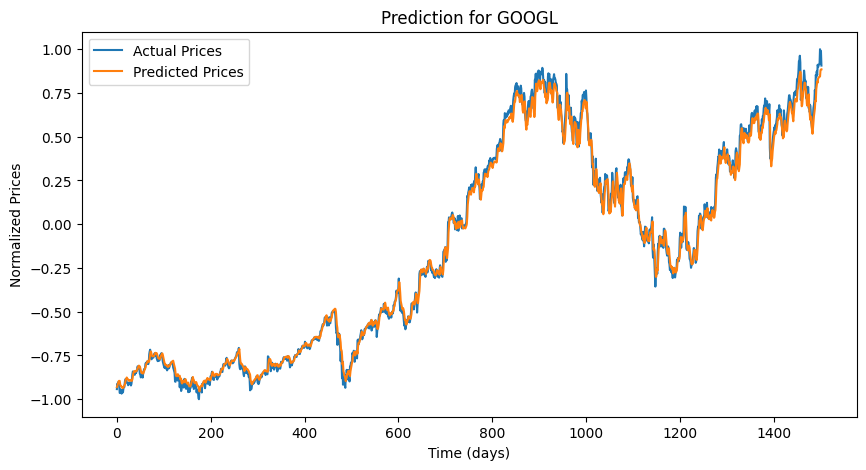

Training and evaluating model for JNJ
Loss for JNJ: 0.0029456517659127712


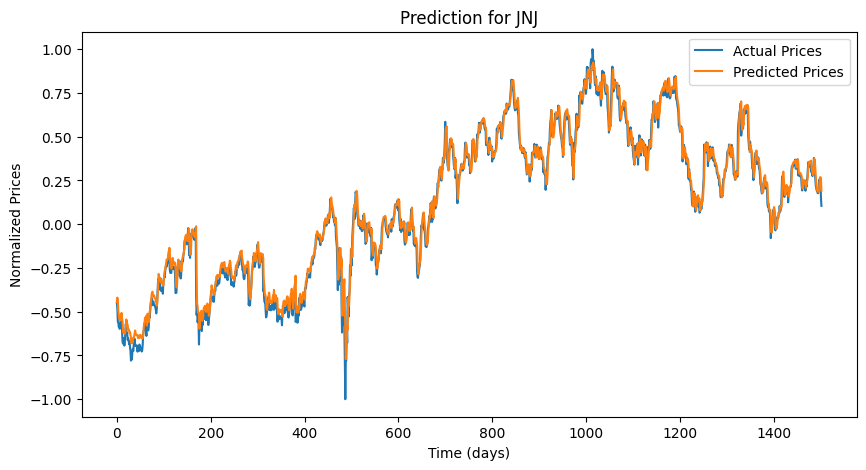

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

all_models = {}  # Dictionary to hold all trained models
all_scalers = {}  # Dictionary to hold all scalers for inverse transformation later

# LSTM model with hyperparameters for dropout
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True) #, dropout_rate = dropout_rate
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameter dictionary
hyperparams = {
    'input_size': 1,
    'hidden_size': 50,
    'num_layers': 2,
    'dropout': 0.2,
    'learning_rate': 0.001,
    'epochs': 100,
    'batch_size': 16
}

# Training function
def train_model(data, hyperparams, model, optimizer, criterion):
    model.train()
    inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)
    targets = torch.tensor(data[:, 0]).float().unsqueeze(1)
    dataset = TensorDataset(inputs, targets)
    loader = DataLoader(dataset, batch_size=hyperparams['batch_size'], shuffle=True)
    for epoch in range(hyperparams['epochs']):
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

# Evaluating function
def evaluate_model(data, model, criterion):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(data[:, 1:]).float().unsqueeze(-1)
        targets = torch.tensor(data[:, 0]).float().unsqueeze(1)
        dataset = TensorDataset(inputs, targets)
        loader = DataLoader(dataset, batch_size=16, shuffle=False)
        predictions = []
        actuals = []
        for inputs, targets in loader:
            outputs = model(inputs)
            predictions.append(outputs)
            actuals.append(targets)
        predictions = torch.cat(predictions).view(-1)
        actuals = torch.cat(actuals).view(-1)
        loss = criterion(predictions, actuals)
        return predictions.numpy(), actuals.numpy(), loss.item()

# Subset of Dow Jones companies
dowjones_comps = ["AAPL", "AMZN", "GOOGL", "JNJ"] #, "PFE", "MRK", "UNH", "ABT", "PG", "KO", "PEP", "WMT", "HD", "GS", "JPM", "V", "AXP", "CRM", "DIS", "NFLX", "CMCSA", "T", "INTC", "NKE", "MCD", "SBUX", "CAT", "MMM", "BA", "HON", "UNP", "DOW", "IBM", "CSCO", "AAP", "TRV", "CVX", "XOM", "VZ", "MS", "RTX", "WBA"]


multi_data = yf.download(dowjones_comps, start="2018-04-05", end="2024-04-05")

# Iterate over stocks
for stock in dowjones_comps:
    print(f'Training and evaluating model for {stock}')
    model = StockLSTM(hyperparams['input_size'], hyperparams['hidden_size'], hyperparams['num_layers']) #, hyperparams['dropout'])
    optimizer = torch.optim.Adam(model.parameters(), lr=hyperparams['learning_rate'])
    criterion = nn.MSELoss()

    # Training and Evaluation
    train_data, _ = prepare_stock_data(stock, multi_data, 7)
    train_model(train_data, hyperparams, model, optimizer, criterion)

        # Save model and scaler
    all_models[stock] = model
    all_scalers[stock] = scaler

    predictions, actuals, loss = evaluate_model(train_data, model, criterion)

    print(f'Loss for {stock}: {loss}')

    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'Prediction for {stock}')
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized Prices')
    plt.legend()
    plt.show()







[*********************100%%**********************]  3 of 3 completed


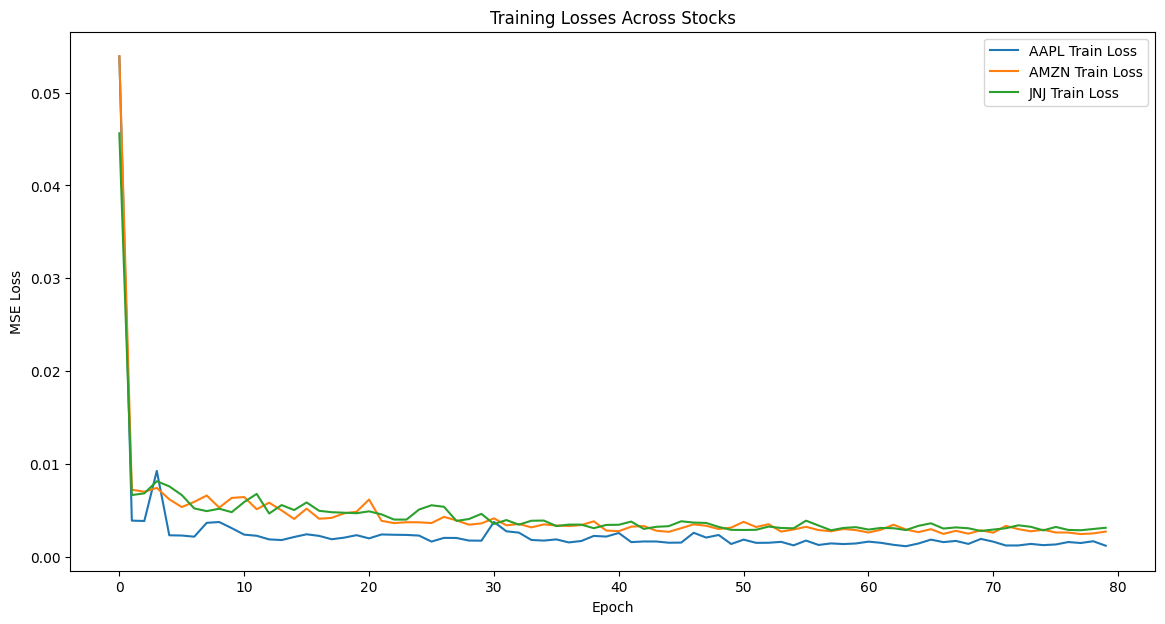

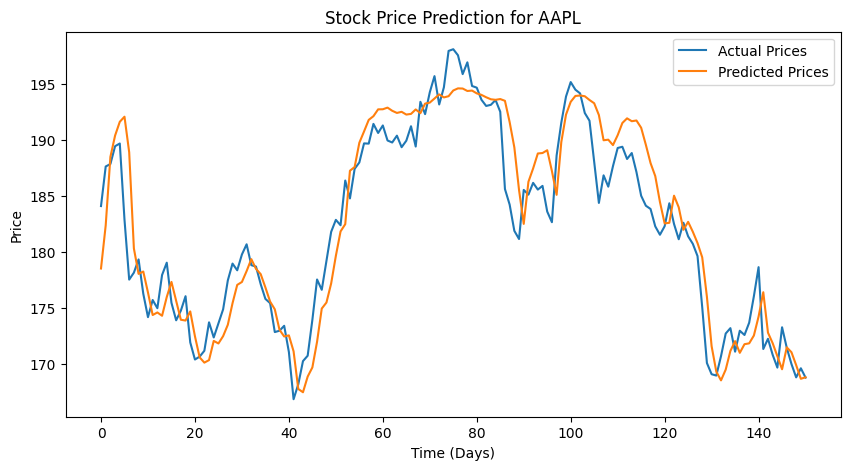

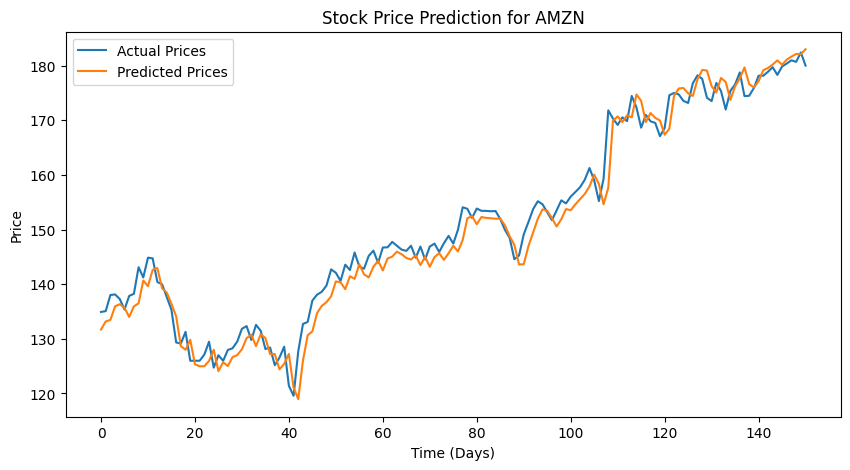

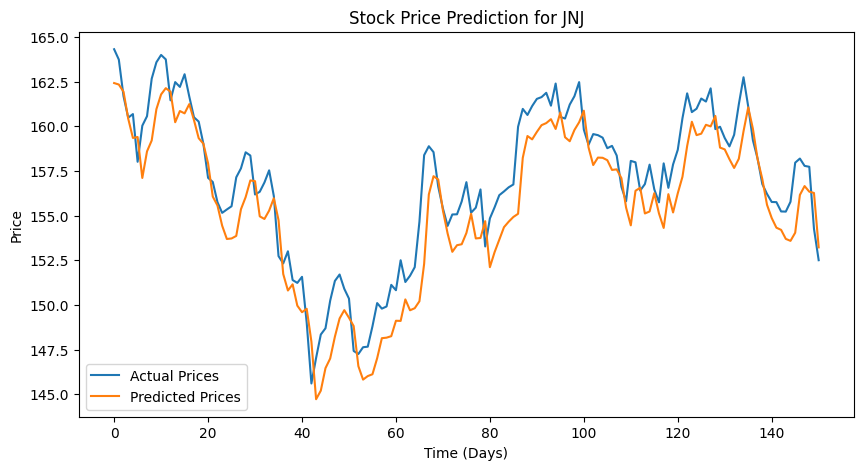

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from torch.optim.lr_scheduler import StepLR
# LSTM Model Definition
# Parameters
input_size = 1
hidden_size = 50
num_layers = 3
epochs = 80
batch_size = 32
learning_rate = 0.01

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out




# Download and prepare data
dowjones_comps = ["AAPL", "AMZN", "JNJ"]
multi_data = yf.download(dowjones_comps, start="2018-04-05", end="2024-04-05")

# Data Preparation and Splitting
def prepare_and_split_data(stock_symbol, data, n_lags, split_ratio=0.9):
    series = data['Close'][stock_symbol].dropna()
    df = pd.DataFrame(series)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = series.shift(i)
    df.dropna(inplace=True)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(df)
    split_point = int(len(scaled_data) * split_ratio)
    return scaled_data[:split_point], scaled_data[split_point:], scaler

# Prepare data for each stock
train_data, test_data, scalers = {}, {}, {}
for stock in dowjones_comps:
    train_data[stock], test_data[stock], scalers[stock] = prepare_and_split_data(stock, multi_data, n_lags=7)

# Training and Testing Functions
def train_and_validate(data, model, optimizer, criterion, epochs, batch_size):
    train_losses = []
    for epoch in range(epochs):
        model.train()
        dataset = TensorDataset(torch.tensor(data[:, 1:]).float().unsqueeze(-1),
                                torch.tensor(data[:, 0]).float().unsqueeze(1))
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        epoch_loss = 0
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        epoch_loss /= len(loader.dataset)
        train_losses.append(epoch_loss)
    return train_losses

# Train models for each stock
all_models = {}
all_losses = {}
for stock in dowjones_comps:
    model = StockLSTM(input_size, hidden_size, num_layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    losses = train_and_validate(train_data[stock], model, optimizer, criterion, epochs, batch_size)
    all_models[stock] = model
    all_losses[stock] = losses

# Plot training losses
plt.figure(figsize=(14, 7))
for stock, losses in all_losses.items():
    plt.plot(losses, label=f'{stock} Train Loss')
plt.title('Training Losses Across Stocks')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

for stock in dowjones_comps:
    model = all_models[stock]
    scaler = scalers[stock]
    with torch.no_grad():
        model.eval()
        inputs = torch.tensor(test_data[stock][:, 1:]).float().unsqueeze(-1)  # Reshape for model input
        predictions = model(inputs).view(-1).numpy()  # Flatten the output and convert to numpy
        actuals = test_data[stock][:, 0]  # Actual values
        dummy_features = np.zeros((predictions.shape[0], 7))
        full_predictions = np.column_stack((predictions, dummy_features))  # Combine predictions with dummy features

        # Inverse transform and take the first column which contains the predicted values
        predictions = scaler.inverse_transform(full_predictions)[:, 0]

        # Inverse transform actuals (similarly adding dummy features to match shape)
        full_actuals = np.column_stack((actuals, dummy_features))
        actuals = scaler.inverse_transform(full_actuals)[:, 0]

        plt.figure(figsize=(10, 5))
        plt.plot(actuals, label='Actual Prices')
        plt.plot(predictions, label='Predicted Prices')
        plt.title(f'Stock Price Prediction for {stock}')
        plt.xlabel('Time (Days)')
        plt.ylabel('Price')
        plt.legend()
        plt.show()





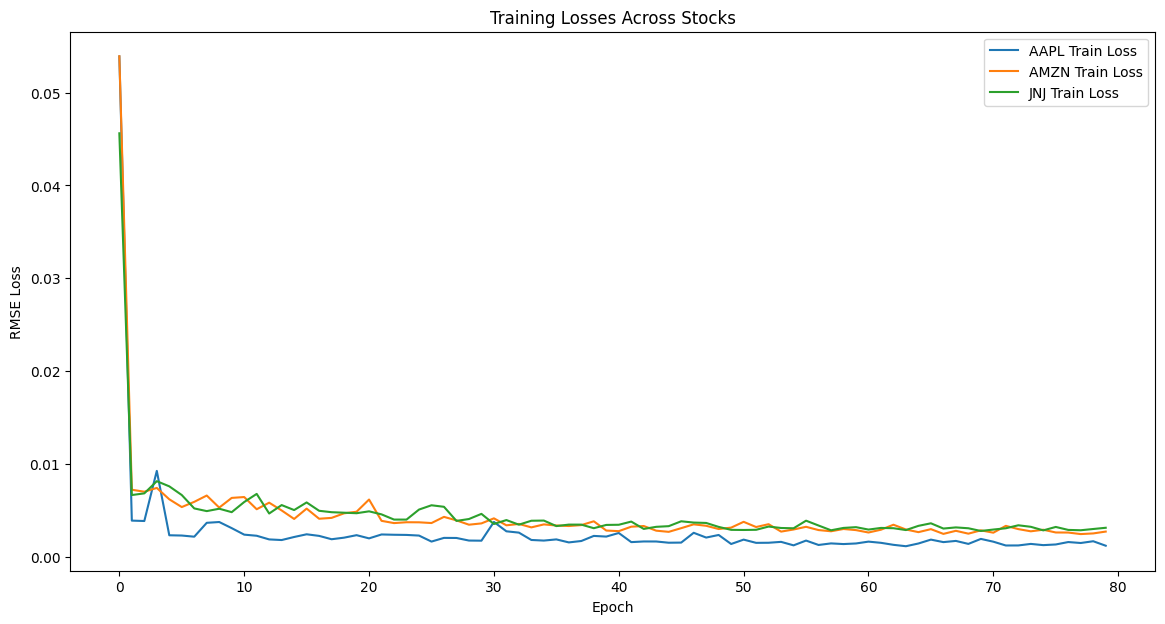

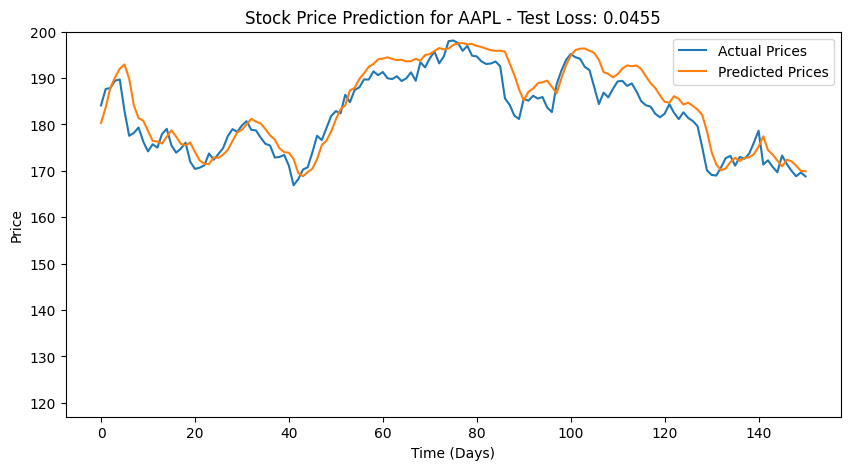

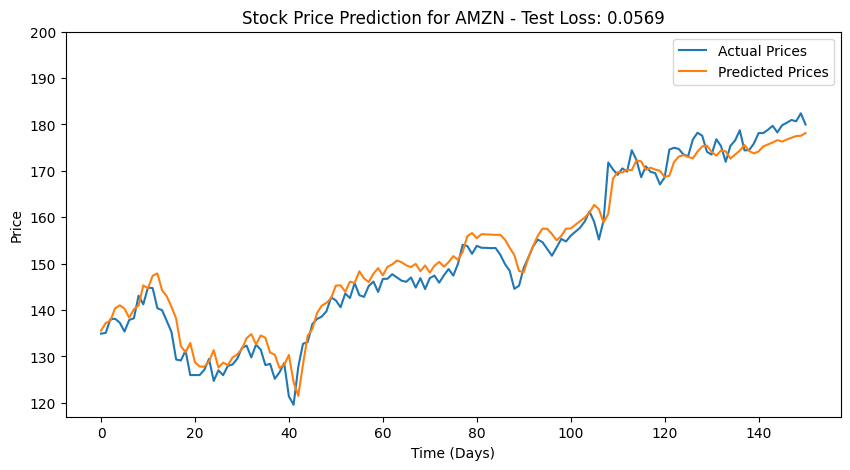

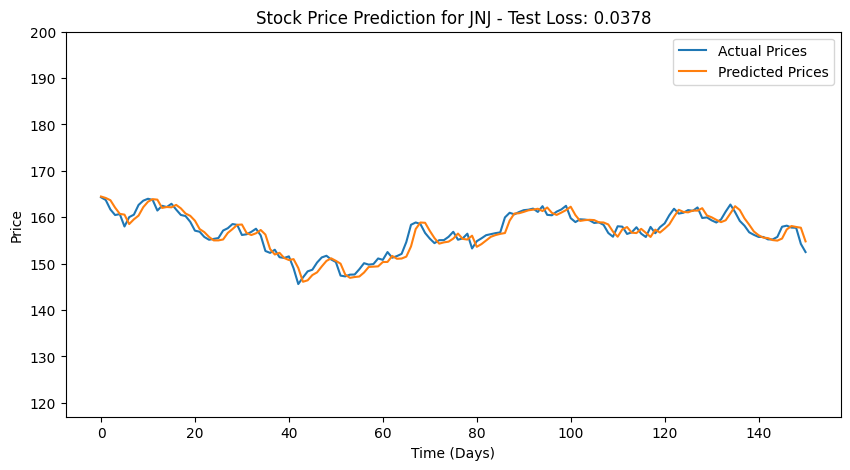

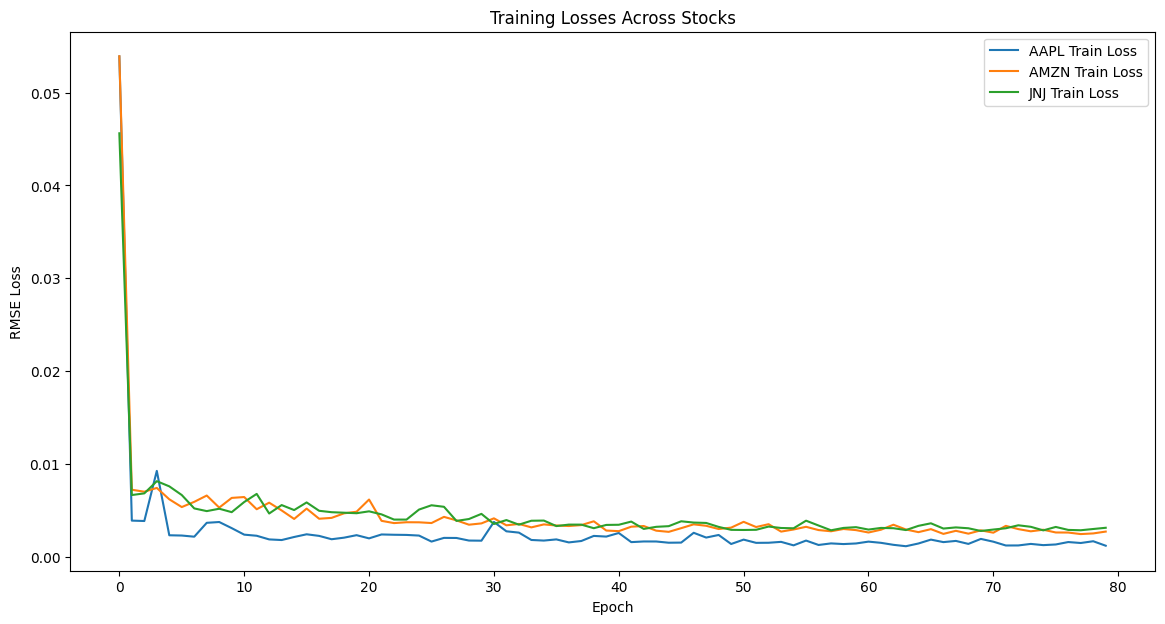

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
input_size = 1
hidden_size = 50
num_layers = 3
epochs = 80
batch_size = 8
learning_rate = 0.001
dropout_rate = 0.2
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout_rate):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate if num_layers > 1 else 0.0)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out


def train_and_validate(data, model, optimizer, criterion, epochs, batch_size):
    train_losses = []
    for epoch in range(epochs):
        model.train()
        dataset = TensorDataset(torch.tensor(data[:, 1:]).float().unsqueeze(-1),
                                torch.tensor(data[:, 0]).float().unsqueeze(1))
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        epoch_loss = 0
        for inputs, targets in loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        epoch_loss /= len(loader.dataset)
        train_losses.append(epoch_loss)
    return train_losses
# Plot training losses
plt.figure(figsize=(14, 7))
for stock, losses in all_losses.items():
    plt.plot(losses, label=f'{stock} Train Loss')
plt.title('Training Losses Across Stocks')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend()
plt.show()
# Function to evaluate test data
def evaluate_test_data(test_data, model, criterion, scaler):
    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(test_data[:, 1:]).float().unsqueeze(-1)
        targets = torch.tensor(test_data[:, 0]).float().unsqueeze(1)
        outputs = model(inputs)
        test_loss = criterion(outputs, targets).item()

        predictions = outputs.view(-1).numpy()
        actuals = targets.view(-1).numpy()

        # Inverse transform predictions and actuals
        dummy_features = np.zeros((len(predictions), 7))  # 7 lag features
        predictions_full = np.column_stack((predictions, dummy_features))
        actuals_full = np.column_stack((actuals, dummy_features))

        predictions_inversed = scaler.inverse_transform(predictions_full)[:, 0]
        actuals_inversed = scaler.inverse_transform(actuals_full)[:, 0]

        return predictions_inversed, actuals_inversed, test_loss
def RMSE(outputs, targets):
    mse_loss = nn.MSELoss()
    mse = mse_loss(outputs, targets)
    rmse = torch.sqrt(mse)
    return rmse
# Training models and evaluating each stock
for stock in dowjones_comps:
    model = StockLSTM(input_size, hidden_size, num_layers, dropout_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = RMSE
    train_and_validate(train_data[stock], model, optimizer, criterion, epochs, batch_size)
    predictions, actuals, test_loss = evaluate_test_data(test_data[stock], model, criterion, scalers[stock])

    # Plotting predictions vs actuals with test loss in title
    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'Stock Price Prediction for {stock} - Test Loss: {test_loss:.4f}')
    plt.xlabel('Time (Days)')
    plt.ylabel('Price')
    plt.ylim(117, 200)
    plt.legend()
    plt.show()

plt.figure(figsize=(14, 7))
for stock, losses in all_losses.items():
    plt.plot(losses, label=f'{stock} Train Loss')
plt.title('Training Losses Across Stocks')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# Constants for configuration
CONFIG = {
    'input_size': 1,
    'hidden_size': 50,
    'num_layers': 3,
    'epochs': 80,
    'batch_size': 32,
    'learning_rate': 0.001,
    'lag_features': 7,
    'ylim': (117, 200)
}

class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # We only care about the last output
        return out

def train_and_validate(model, data, optimizer, criterion, config):
    model.train()
    train_losses = []
    loader = DataLoader(TensorDataset(*data), batch_size=config['batch_size'], shuffle=True)

    for epoch in range(config['epochs']):
        epoch_loss = 0.0
        for inputs, targets in loader:
            optimizer.zero_grad()
            loss = criterion(model(inputs), targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * inputs.size(0)
        epoch_loss /= len(loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{config["epochs"]}, Loss: {epoch_loss:.4f}')

    return train_losses

def evaluate_test_data(model, test_data, criterion, scaler, config):
    model.eval()
    inputs, targets = test_data
    with torch.no_grad():
        outputs = model(inputs)
        test_loss = criterion(outputs, targets).item()

    predictions = scaler.inverse_transform(outputs.view(-1).numpy())
    actuals = scaler.inverse_transform(targets.view(-1).numpy())

    return predictions, actuals, test_loss

def plot_predictions(actuals, predictions, test_loss, stock, config):
    plt.figure(figsize=(10, 5))
    plt.plot(actuals, label='Actual Prices')
    plt.plot(predictions, label='Predicted Prices')
    plt.title(f'Stock Price Prediction for {stock} - Test Loss: {test_loss:.4f}')
    plt.xlabel('Time (Days)')
    plt.ylabel('Price')
    plt.ylim(config['ylim'])
    plt.legend()
    plt.show()

# Define RMSE as a function outside of loop for reusability
def RMSE(outputs, targets):
    return torch.sqrt(nn.MSELoss()(outputs, targets))

# Main loop for training and evaluating each stock
for stock in dowjones_comps:
    model = StockLSTM(CONFIG['input_size'], CONFIG['hidden_size'], CONFIG['num_layers'])
    optimizer = torch.optim.Adam(model.parameters(), lr=CONFIG['learning_rate'])

    train_tensor_data = (
        torch.tensor(train_data[stock][:, 1:]).float().unsqueeze(-1),
        torch.tensor(train_data[stock][:, 0]).float().unsqueeze(1)
    )
    test_tensor_data = (
        torch.tensor(test_data[stock][:, 1:]).float().unsqueeze(-1),
        torch.tensor(test_data[stock][:, 0]).float().unsqueeze(1)
    )

    train_losses = train_and_validate(model, train_tensor_data, optimizer, RMSE, CONFIG)
    predictions, actuals, test_loss = evaluate_test_data(model, test_tensor_data, RMSE, scalers[stock], CONFIG)
    plot_predictions(actuals, predictions, test_loss, stock, CONFIG)


Epoch 1/80, Loss: 0.4142
Epoch 2/80, Loss: 0.0844
Epoch 3/80, Loss: 0.0512
Epoch 4/80, Loss: 0.0448
Epoch 5/80, Loss: 0.0424
Epoch 6/80, Loss: 0.0445
Epoch 7/80, Loss: 0.0411
Epoch 8/80, Loss: 0.0421
Epoch 9/80, Loss: 0.0410
Epoch 10/80, Loss: 0.0408
Epoch 11/80, Loss: 0.0438
Epoch 12/80, Loss: 0.0398
Epoch 13/80, Loss: 0.0405
Epoch 14/80, Loss: 0.0394
Epoch 15/80, Loss: 0.0448
Epoch 16/80, Loss: 0.0387
Epoch 17/80, Loss: 0.0436
Epoch 18/80, Loss: 0.0398
Epoch 19/80, Loss: 0.0377
Epoch 20/80, Loss: 0.0414
Epoch 21/80, Loss: 0.0417
Epoch 22/80, Loss: 0.0389
Epoch 23/80, Loss: 0.0380
Epoch 24/80, Loss: 0.0395
Epoch 25/80, Loss: 0.0384
Epoch 26/80, Loss: 0.0376
Epoch 27/80, Loss: 0.0381
Epoch 28/80, Loss: 0.0411
Epoch 29/80, Loss: 0.0415
Epoch 30/80, Loss: 0.0381
Epoch 31/80, Loss: 0.0379
Epoch 32/80, Loss: 0.0393
Epoch 33/80, Loss: 0.0408
Epoch 34/80, Loss: 0.0383
Epoch 35/80, Loss: 0.0372
Epoch 36/80, Loss: 0.0378
Epoch 37/80, Loss: 0.0381
Epoch 38/80, Loss: 0.0373
Epoch 39/80, Loss: 0.

ValueError: Expected 2D array, got 1D array instead:
array=[0.7678364  0.79517853 0.8295861  0.8493483  0.86660165 0.8758907
 0.84544015 0.7984993  0.7741873  0.76863784 0.75167817 0.7314118
 0.72822714 0.7235553  0.73754734 0.7525375  0.7417738  0.72567046
 0.7203442  0.72498214 0.7063271  0.68664694 0.67655665 0.67438877
 0.68819785 0.68997276 0.69743294 0.708295   0.7284542  0.7481835
 0.7556475  0.766191   0.7763767  0.771799   0.76760095 0.7565595
 0.7430401  0.7334102  0.7145307  0.7044394  0.70183194 0.6884968
 0.6577827  0.6466041  0.65267026 0.6606207  0.68361175 0.7170849
 0.7309817  0.7510965  0.77543783 0.79419696 0.8011958  0.82473713
 0.82939976 0.84447265 0.8554872  0.86965704 0.8769602  0.889045
 0.8913095  0.8951504  0.89032483 0.88630795 0.88715464 0.8828192
 0.8832836  0.8902098  0.8852922  0.90195155 0.90623343 0.9175593
 0.9305008  0.9249665  0.9282652  0.94569004 0.95628357 0.95892173
 0.9515535  0.95178616 0.9421944  0.9361242  0.9279313  0.9210071
 0.91805494 0.91899145 0.9147583  0.8782691  0.84952915 0.82199985
 0.8039067  0.81836617 0.82658994 0.8367852  0.8389382  0.84101325
 0.8299924  0.81828386 0.8426807  0.8728913  0.90128255 0.9218637
 0.9280423  0.9281971  0.91895735 0.91003036 0.88705623 0.8557608
 0.85093826 0.8450707  0.8521869  0.8652278  0.8731503  0.8714453
 0.8723337  0.8640683  0.84840256 0.8348937  0.8262663  0.81414187
 0.8037939  0.8024219  0.8131938  0.8103328  0.80104816 0.80299944
 0.7981962  0.7919731  0.7827265  0.75320506 0.7089007  0.6775986
 0.66028523 0.66191363 0.6762158  0.6883611  0.68361074 0.6897901
 0.69120467 0.69786555 0.7147726  0.73886263 0.71293384 0.70032793
 0.685083   0.6704482  0.6824901  0.6812601  0.6724911  0.66027963
 0.6573422 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Since the data provided by the user in the form of a list, let's structure it into a pandas DataFrame for better visualization.
import pandas as pd

data = [
    {"hidden_size": 50, "batch_size": 32, "learning_rate": 0.001, "dropout_rate": 0.0, "AAPL_RMSE": 0.0558, "AMZN_RMSE": 0.0702, "JNJ_RMSE": 0.0476},
    {"hidden_size": 50, "batch_size": 16, "learning_rate": 0.001, "dropout_rate": 0.0, "AAPL_RMSE": 0.0348, "AMZN_RMSE": 0.045, "JNJ_RMSE": 0.0409},
    {"hidden_size": 25, "batch_size": 16, "learning_rate": 0.001, "dropout_rate": 0.0, "AAPL_RMSE": 0.0424, "AMZN_RMSE": 0.0483, "JNJ_RMSE": 0.0427},
    {"hidden_size": 50, "batch_size": 16, "learning_rate": 0.01, "dropout_rate": 0.0, "AAPL_RMSE": 0.0481, "AMZN_RMSE": 0.0542, "JNJ_RMSE": 0.0499},
    {"hidden_size": 50, "batch_size": 16, "learning_rate": 0.1, "dropout_rate": 0.0, "AAPL_RMSE": 0.9169, "AMZN_RMSE": 0.0799, "JNJ_RMSE": 0.1589},
    {"hidden_size": 50, "batch_size": 16, "learning_rate": 0.01, "dropout_rate": 0.2, "AAPL_RMSE": 0.037, "AMZN_RMSE": 0.0465, "JNJ_RMSE": 0.0367},
    {"hidden_size": 50, "batch_size": 16, "learning_rate": 0.001, "dropout_rate": 0.2, "AAPL_RMSE": 0.0395, "AMZN_RMSE": 0.0474, "JNJ_RMSE": 0.0378},
    {"hidden_size": 50, "batch_size": 16, "learning_rate": 0.001, "dropout_rate": 0.3, "AAPL_RMSE": 0.0473, "AMZN_RMSE": 0.0464, "JNJ_RMSE": 0.0383},
    {"hidden_size": 50, "batch_size": 16, "learning_rate": 0.01, "dropout_rate": 0.3, "AAPL_RMSE": 0.0449, "AMZN_RMSE": 0.0578, "JNJ_RMSE": 0.0392},
    {"hidden_size": 50, "batch_size": 32, "learning_rate": 0.001, "dropout_rate": 0.3, "AAPL_RMSE": 0.0442, "AMZN_RMSE": 0.0464, "JNJ_RMSE": 0.0417},
    {"hidden_size": 50, "batch_size": 32, "learning_rate": 0.001, "dropout_rate": 0.2, "AAPL_RMSE": 0.0353, "AMZN_RMSE": 0.0622, "JNJ_RMSE": 0.0408},
    {"hidden_size": 25, "batch_size": 16, "learning_rate": 0.001, "dropout_rate": 0.2, "AAPL_RMSE": 0.0437, "AMZN_RMSE": 0.048, "JNJ_RMSE": 0.0393}
]

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data)

# Setting the index to enumerate the experiments
df.index = ["Experiment " + str(i+1) for i in range(len(df))]
df.index.name = "Experiment"

df


,hidden_size,batch_size,learning_rate,dropout_rate,AAPL_RMSE,AMZN_RMSE,JNJ_RMSE
Experiment,,,,,,,
Experiment 1,50,32,0.001,0.0,0.0558,0.0702,0.0476
Experiment 2,50,16,0.001,0.0,0.0348,0.0450,0.0409
Experiment 3,25,16,0.001,0.0,0.0424,0.0483,0.0427
Experiment 4,50,16,0.010,0.0,0.0481,0.0542,0.0499
Experiment 5,50,16,0.100,0.0,0.9169,0.0799,0.1589
Experiment 6,50,16,0.010,0.2,0.0370,0.0465,0.0367
Experiment 7,50,16,0.001,0.2,0.0395,0.0474,0.0378
Experiment 8,50,16,0.001,0.3,0.0473,0.0464,0.0383
Experiment 9,50,16,0.010,0.3,0.0449,0.0578,0.0392


from matplotlib import pyplot as plt
_df_0['hidden_size'].plot(kind='hist', bins=20, title='hidden_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['batch_size'].plot(kind='hist', bins=20, title='batch_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['learning_rate'].plot(kind='hist', bins=20, title='learning_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['dropout_rate'].plot(kind='hist', bins=20, title='dropout_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='hidden_size', y='batch_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='batch_size', y='learning_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='learning_rate', y='dropout_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='dropout_rate', y='AAPL_RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['hidden_size'].plot(kind='line', figsize=(8, 4), title='hidden_size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['batch_size'].plot(kind='line', figsize=(8, 4), title='batch_size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['learning_rate'].plot(kind='line', figsize=(8, 4), title='learning_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['dropout_rate'].plot(kind='line', figsize=(8, 4), title='dropout_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
average_rmse_16 = df[df['batch_size'] == 16][['AAPL_RMSE', 'AMZN_RMSE', 'JNJ_RMSE']].mean().mean()
average_rmse_32 = df[df['batch_size'] == 32][['AAPL_RMSE', 'AMZN_RMSE', 'JNJ_RMSE']].mean().mean()

# Create a comparison table
comparison_table = pd.DataFrame({
    'Batch Size': ['16', '32'],
    'Average RMSE': [average_rmse_16, average_rmse_32]
})

comparison_table

,Batch Size,Average RMSE
0,16,0.081919
1,32,0.049356


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Dow Jones components
dowjones_comps = ["AAPL", "MSFT", "AMZN", "GOOGL"] #, "JNJ", "PFE", "MRK", "UNH", "ABT", "PG", "KO", "PEP", "WMT", "HD", "GS", "JPM", "V", "AXP", "CRM", "DIS", "NFLX", "CMCSA", "T", "INTC", "NKE", "MCD", "SBUX", "CAT", "MMM", "BA", "HON", "UNP", "DOW", "IBM", "CSCO", "AAP", "TRV", "CVX", "XOM", "VZ", "MS", "RTX", "WBA"]

multi_data2 = yf.download(dowjones_comps, start="2024-04-05", end="2024-04-24")
data_for_prediction = multi_data2['Close'].dropna()
data_for_prediction

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2024-04-05,169.580002,185.070007,152.500000,425.519989
2024-04-08,168.449997,185.190002,154.850006,424.589996
2024-04-09,169.669998,185.669998,156.600006,426.279999
2024-04-10,167.779999,185.949997,156.139999,423.260010
2024-04-11,175.039993,189.050003,159.410004,427.929993
2024-04-12,176.550003,186.130005,157.729996,421.899994
2024-04-15,172.690002,183.619995,154.860001,413.640015
2024-04-16,169.380005,183.320007,154.399994,414.579987
2024-04-17,168.000000,181.279999,155.470001,411.839996


In [ ]:
import yfinance as yf

# Set the ticker
ticker = "FCEL"

# Download stock data
data = yf.download(ticker, start="2020-01-01", end="2024-05-02")

# Display the first few rows of the dataframe
print(data.tail(15))

# Save to CSV (optional)
data.to_csv(f"{ticker}_stock_data.csv")


[*********************100%%**********************]  1 of 1 completed

            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2024-04-11  1.15  1.18  1.11   1.14       1.14  11852800
2024-04-12  1.13  1.16  1.10   1.10       1.10   7921000
2024-04-15  1.12  1.12  1.01   1.02       1.02  13488800
2024-04-16  1.02  1.04  1.00   1.00       1.00   9745500
2024-04-17  1.01  1.03  1.00   1.00       1.00   8549900
2024-04-18  1.00  1.01  0.92   0.93       0.93  69232600
2024-04-19  0.94  0.95  0.87   0.88       0.88  29405300
2024-04-22  0.90  0.90  0.79   0.81       0.81  52296300
2024-04-23  0.82  0.96  0.81   0.92       0.92  53833500
2024-04-24  0.96  0.96  0.85   0.86       0.86  38088800
2024-04-25  0.85  0.86  0.81   0.84       0.84  32385300
2024-04-26  0.85  0.87  0.81   0.87       0.87  34865700
2024-04-29  0.88  0.97  0.88   0.93       0.93  45811200
2024-04-30  0.91  0.95  0.86   0.93       0.93  60914500
2024-05-01  0.92  0.95  0.89   0.90       0.90  24108700


In [ ]:
import yfinance as yf

# Set the ticker
ticker = "LIN"

# Download stock data
data2 = yf.download(ticker, start="2020-01-01", end="2024-05-03")

# Display the first few rows of the dataframe
print(data2.tail())

# Save to CSV (optional)
data2.to_csv(f"{ticker}_stock_data.csv")

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-26  439.459991  445.690002  439.459991  443.179993  443.179993   
2024-04-29  445.769989  448.130005  442.279999  445.070007  445.070007   
2024-04-30  443.649994  444.709991  440.250000  440.959991  440.959991   
2024-05-01  442.790009  449.399994  441.980011  442.619995  442.619995   
2024-05-02  424.010010  424.869995  413.700012  417.510010  417.510010   

             Volume  
Date                 
2024-04-26  1583800  
2024-04-29  1260300  
2024-04-30  2172700  
2024-05-01  1824100  
2024-05-02  2996587  


In [ ]:
import yfinance as yf

# Set the ticker
ticker = "ADP"

# Download stock data
data3 = yf.download(ticker, start="2020-01-01", end="2024-05-03")

# Display the first few rows of the dataframe
print(data3.tail())

# Save to CSV (optional)
data3.to_csv(f"{ticker}_stock_data.csv")

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-26  244.100006  246.710007  242.960007  243.070007  243.070007   
2024-04-29  244.050003  244.949997  243.179993  243.949997  243.949997   
2024-04-30  244.190002  244.490005  241.809998  241.889999  241.889999   
2024-05-01  249.690002  253.720001  244.520004  247.330002  247.330002   
2024-05-02  246.009995  246.955002  241.029999  241.360001  241.360001   

             Volume  
Date                 
2024-04-26  1555500  
2024-04-29  1153500  
2024-04-30  1944900  
2024-05-01  2782100  
2024-05-02   673380  


In [ ]:
data_aapl

NameError: name 'data_aapl' is not defined